## Title

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import ROOT

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.chdir(ROOT)

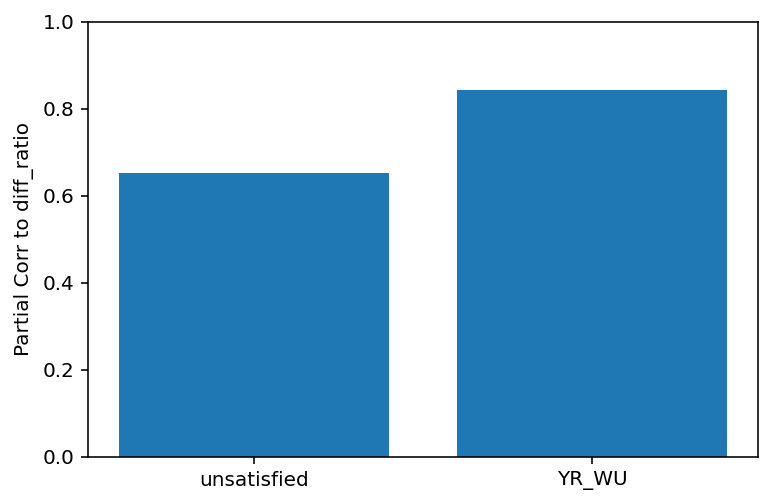

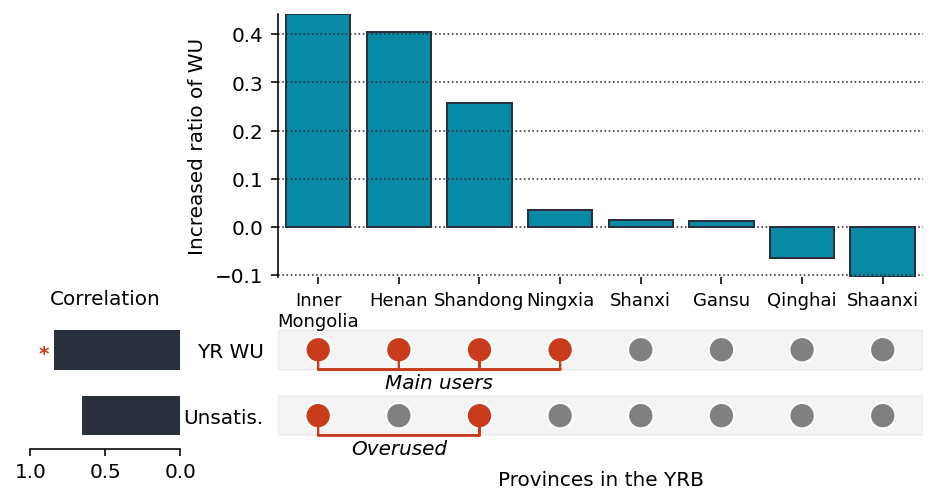

In [3]:
from func.handle import ExpResultsHandler

YAML_87 = "reports/n1987/87_all_wci.yaml"
exp87 = ExpResultsHandler(yaml_file=YAML_87)
exp87.load_from_pickle()

statistic = exp87.get_statistic_df()

xs = ['unsatisfied', 'YR_WU']
corrs, p_vals = exp87.correlation_analysis(xs=['unsatisfied', 'YR_WU'], y='diff_ratio')
bools = [
    statistic['YR_WU'] > statistic['scheme87'], 
    statistic['YR_WU'] > statistic['YR_WU'].median(),
]
notes = ['test1', 'test2']

items = list(zip(['Unsatis.', 'YR WU'], bools, ['Overused', 'Main users'], corrs, p_vals))
ax1, ax2, ax3 = exp87.plot_upset(items)

claen_labels = []
for label in ax1.get_xticklabels():
    text = label.get_text()
    if text == "Neimeng":
        text = 'Inner\nMongolia'
    elif text == 'Shanxi':
        text = 'Shaanxi'
    elif text == 'Shaanxi':
        text = 'Shanxi'
    claen_labels.append(text)
ax1.set_xticklabels(claen_labels)

plt.savefig("figs/outputs/upset_87.pdf", format='pdf')
plt.show();

## Compare 87-98 regulating

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [4]:
YAML_87 = "reports/n1987/87_all_wci.yaml"
exp87 = ExpResultsHandler(yaml_file=YAML_87)
exp87.load_from_pickle()

YAML_98 = "reports/n1998/98_all_wci.yaml"
exp98 = ExpResultsHandler(yaml_file=YAML_98)
exp98.load_from_pickle()

statistic_87 = exp87.get_statistic_df()
statistic_98 = exp98.get_statistic_df()

ExpResultsHandler(name='87aw', state='loaded', description='Excluding 3 provinces, X_inputs (irrigation area, population, gdp1~3, livestock), with water saving!', _updated_time='2022-03-16, 21:51:16')

ExpResultsHandler(name='98aw', state='loaded', description='Excluding 3 provinces, X_inputs (irrigation area, population, gdp1~3, livestock), with water saving!', _updated_time='2022-03-16, 14:09:13')

In [5]:
test = statistic_87['YR_WU'] + statistic_98['YR_WU']
test/test.sum()
base = (statistic_87['scheme87']/statistic_87['scheme87'].sum())

Gansu       0.091292
Henan       0.121088
Neimeng     0.220083
Ningxia     0.130051
Qinghai     0.042683
Shaanxi     0.042279
Shandong    0.277591
Shanxi      0.074933
Name: YR_WU, dtype: float64

In [6]:
compare_df = pd.DataFrame()
compare_df['87_ratio'] = statistic_87['diff_ratio']
compare_df['98_ratio'] = statistic_98['diff_ratio']
compare_df['wu_ratio_87'] = statistic_87['YR_WU']/statistic_87['YR_WU'].sum()
compare_df['wu_ratio_98'] = statistic_98['YR_WU']/statistic_98['YR_WU'].sum()
compare_df = compare_df.sort_values('87_ratio', ascending=False)

/var/folders/m8/qpvn85g95rbgw5j_qb5g2pzh0000gn/T/ipykernel_68025/2598509710.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticklabels)
/var/folders/m8/qpvn85g95rbgw5j_qb5g2pzh0000gn/T/ipykernel_68025/2598509710.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(claen_labels)


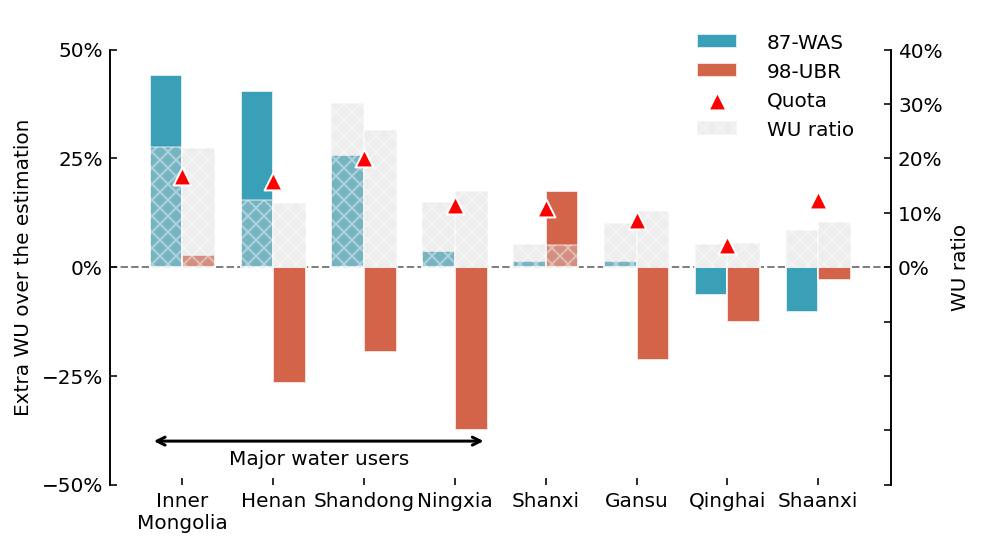

In [7]:
from matplotlib import ticker
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig, ax1 = plt.subplots(figsize=(7, 4))

width = 0.36
x = np.arange(8)
index = compare_df.index
ax2 = ax1.twinx()

ax2.bar(x-width/2, width=width, height=compare_df['wu_ratio_87'], color='lightgray', alpha=0.4, edgecolor='white', hatch="xxx", label='WU ratio', zorder=0)
ax2.bar(x+width/2, width=width, height=compare_df['wu_ratio_98'], color='lightgray', alpha=0.4, edgecolor='white', hatch="xxx", zorder=0)
ax2.scatter(range(8), base[compare_df.index], marker="^", color='red', edgecolor='white', s=80, label="Quota")

ax1.bar(x-width/2, width=width, height=compare_df['87_ratio'], color='#0889A6', alpha=0.8, zorder=1, label='87-WAS', edgecolor='white')
ax1.bar(x+width/2, width=width, height=compare_df['98_ratio'], color='#C83C1C', alpha=0.8, zorder=1, label='98-UBR', edgecolor='white')


# 坐标轴距离
ax1.set_yticks(np.arange(-0.5, 0.51, 0.25))
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlim(-0.8, 7.8)
ax2.set_yticks(np.arange(-0.4, 0.41, 0.1))
ax2.set_ylim(-0.4, 0.4)
ax2.set_yticklabels(["", "", "", "", "0%", "10%", "20%", "30%", "40%"])

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(False)    

xticklabels = index.to_list()
xticklabels.insert(0, "")
ax1.set_xticklabels(xticklabels)
claen_labels = []
for label in ax1.get_xticklabels():
    text = label.get_text()
    if text == "Neimeng":
        text = 'Inner\nMongolia'
    elif text == 'Shanxi':
        text = 'Shaanxi'
    elif text == 'Shaanxi':
        text = 'Shanxi'
    claen_labels.append(text)
ax1.set_xticklabels(claen_labels)
ax1.set_ylabel("Extra WU over the estimation")
ax2.set_ylabel("WU ratio")
#### 辅助线 ========
ax1.axhline(0, ls='--', color='gray', lw=1, zorder=0)
ax1.annotate("",
        xy=(0-width, -0.4), xycoords='data',
        xytext=(3+width, -0.4), textcoords='data',
        arrowprops=dict(arrowstyle="<->",
                       connectionstyle='arc3',
                       color='black', lw=1.5))
ax1.text(1.5, -0.42, "Major water users", color='black', horizontalalignment='center', verticalalignment='top')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

# -=====  图例

legend_handles = []
legend_labels = []
for handle, label in zip(*ax1.get_legend_handles_labels()):
    legend_handles.append(handle)
    legend_labels.append(label)
    
for handle, label in zip(*ax2.get_legend_handles_labels()):
    legend_handles.append(handle)
    legend_labels.append(label)

fig.legend(loc=(0.7, 0.73), frameon=False, handles=legend_handles, labels=legend_labels, handletextpad=1.5)
plt.savefig("figs/outputs/fig3.pdf", format='pdf')
plt.show();